In [2]:
#libraries

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [4]:
a_data = pd.read_csv('a_data_DI.csv')

In [6]:
a_data.head(10)

,Gender,AgeM,ECV,TPP,SC,TympPoF,OAE1,OAE1.4,OAE2,OAE2.8,...,f.6168.8433.,f.6349.6042.,f.6535.6618.,f.6727.1713.,f.6924.2925.,f.7127.1897.,f.7336.0323.,f.7550.9945.,f.7772.2555.,f.8000.0000.
0,0,112,1.08,0,0.52,1,3.0,10.0,18.0,14.0,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0,114,1.28,0,1.28,0,7.0,4.0,9.0,5.0,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,1,118,1.26,0,0.87,0,9.0,12.0,8.0,12.0,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0,119,0.64,0,0.60,0,13.0,9.0,13.0,11.0,...,0.0077,0.0123,0.0066,0.0000,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,0,95,0.92,0,1.65,0,7.0,0.0,2.0,12.0,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
5,1,111,1.30,0,0.60,1,0.0,3.0,9.0,2.0,...,0.3060,0.2820,0.2514,0.2772,0.2874,0.2652,0.2532,0.2341,0.2317,0.2030
6,1,116,1.73,1,1.33,0,8.0,11.0,6.0,12.0,...,0.3105,0.3007,0.2798,0.2993,0.3104,0.2900,0.2722,0.2397,0.2260,0.1966
7,0,102,1.37,7,0.93,0,6.0,4.0,7.0,6.0,...,0.5026,0.4620,0.4212,0.4585,0.4445,0.3930,0.3481,0.3271,0.3439,0.2956
8,1,109,1.13,0,0.56,0,4.0,4.0,16.0,12.0,...,0.5508,0.5223,0.4925,0.5215,0.5169,0.4954,0.4576,0.4232,0.4244,0.3792
9,0,102,0.80,0,0.70,0,4.0,7.0,11.0,15.0,...,0.3567,0.3303,0.2894,0.3037,0.2970,0.2558,0.2121,0.1836,0.1937,0.1499


In [19]:
list_of_cols = []

for col in a_data:
    list_of_cols.append(col)
    
list_of_cols

['Gender',
 'AgeM',
 'ECV',
 'TPP',
 'SC',
 'TympPoF',
 'OAE1',
 'OAE1.4',
 'OAE2',
 'OAE2.8',
 'OAE4',
 'OAEPoF',
 'OverallPoF',
 'EarSide',
 'f.226.0000.',
 'f.257.3256.',
 'f.280.6155.',
 'f.297.3018.',
 'f.324.2099.',
 'f.343.4884.',
 'f.363.9133.',
 'f.385.5527.',
 'f.408.4789.',
 'f.432.7683.',
 'f.458.5020.',
 'f.471.9372.',
 'f.500.0000.',
 'f.514.6511.',
 'f.545.2539.',
 'f.561.2310.',
 'f.577.6763.',
 'f.594.6036.',
 'f.629.9605.',
 'f.648.4198.',
 'f.667.4199.',
 'f.686.9768.',
 'f.707.1068.',
 'f.727.8266.',
 'f.749.1535.',
 'f.771.1054.',
 'f.793.7005.',
 'f.816.9577.',
 'f.840.8964.',
 'f.865.5366.',
 'f.890.8987.',
 'f.917.0040.',
 'f.943.8743.',
 'f.971.5319.',
 'f.1000.0000.',
 'f.1029.3022.',
 'f.1059.4631.',
 'f.1090.5077.',
 'f.1122.4620.',
 'f.1155.3527.',
 'f.1189.2071.',
 'f.1224.0535.',
 'f.1259.9210.',
 'f.1296.8396.',
 'f.1334.8399.',
 'f.1373.9536.',
 'f.1414.2136.',
 'f.1455.6532.',
 'f.1498.3071.',
 'f.1542.2108.',
 'f.1587.4011.',
 'f.1633.9155.',
 'f.1681

Feature Selection
Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [20]:
#split dataset in features and target variable

feature_cols = ['f.226.0000.',
 'f.257.3256.',
 'f.280.6155.',
 'f.297.3018.',
 'f.324.2099.',
 'f.343.4884.',
 'f.363.9133.',
 'f.385.5527.',
 'f.408.4789.',
 'f.432.7683.',
 'f.458.5020.',
 'f.471.9372.',
 'f.500.0000.',
 'f.514.6511.',
 'f.545.2539.',
 'f.561.2310.',
 'f.577.6763.',
 'f.594.6036.',
 'f.629.9605.',
 'f.648.4198.',
 'f.667.4199.',
 'f.686.9768.',
 'f.707.1068.',
 'f.727.8266.',
 'f.749.1535.',
 'f.771.1054.',
 'f.793.7005.',
 'f.816.9577.',
 'f.840.8964.',
 'f.865.5366.',
 'f.890.8987.',
 'f.917.0040.',
 'f.943.8743.',
 'f.971.5319.',
 'f.1000.0000.',
 'f.1029.3022.',
 'f.1059.4631.',
 'f.1090.5077.',
 'f.1122.4620.',
 'f.1155.3527.',
 'f.1189.2071.',
 'f.1224.0535.',
 'f.1259.9210.',
 'f.1296.8396.',
 'f.1334.8399.',
 'f.1373.9536.',
 'f.1414.2136.',
 'f.1455.6532.',
 'f.1498.3071.',
 'f.1542.2108.',
 'f.1587.4011.',
 'f.1633.9155.',
 'f.1681.7928.',
 'f.1731.0731.',
 'f.1781.7974.',
 'f.1834.0081.',
 'f.1887.7486.',
 'f.1943.0639.',
 'f.2000.0000.',
 'f.2058.6045.',
 'f.2118.9262.',
 'f.2181.0155.',
 'f.2244.9241.',
 'f.2310.7054.',
 'f.2378.4142.',
 'f.2448.1071.',
 'f.2519.8421.',
 'f.2593.6791.',
 'f.2669.6797.',
 'f.2747.9073.',
 'f.2828.4271.',
 'f.2911.3064.',
 'f.2996.6142.',
 'f.3084.4217.',
 'f.3174.8021.',
 'f.3267.8309.',
 'f.3363.5857.',
 'f.3462.1462.',
 'f.3563.5949.',
 'f.3668.0162.',
 'f.3775.4973.',
 'f.3886.1278.',
 'f.4000.0000.',
 'f.4117.2089.',
 'f.4237.8524.',
 'f.4362.0309.',
 'f.4489.8482.',
 'f.4621.4108.',
 'f.4756.8285.',
 'f.4896.2142.',
 'f.5039.6842.',
 'f.5187.3582.',
 'f.5339.3594.',
 'f.5495.8146.',
 'f.5656.8542.',
 'f.5822.6127.',
 'f.5993.2283.',
 'f.6168.8433.',
 'f.6349.6042.',
 'f.6535.6618.',
 'f.6727.1713.',
 'f.6924.2925.',
 'f.7127.1897.',
 'f.7336.0323.',
 'f.7550.9945.',
 'f.7772.2555.',
 'f.8000.0000.']

X = a_data[feature_cols] # Features
y = a_data.OverallPoF # Target variable

### Splitting Data
To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's split the dataset by using function train_test_split(). You need to pass 3 parameters features, target, and test_set size.

In [24]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set (90% training and 10% testing):
X_train, X_test, y_train, y_test = train_test_split(X, y
                                                    ,test_size=0.1
                                                    ,random_state=1)

### Building Decision Tree Model
Let's create a Decision Tree Model using Scikit-learn.

In [25]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### Evaluating Model
Let's estimate, how accurately the classifier or model can predict the type of cultivars. Accuracy can be computed by comparing actual test set values and predicted values.

In [27]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7916666666666666


### Visualise Decision Trees
Can use Scikit-learn's export_graphviz function for display the tree within a Jupyter notebook. 

Need to install graphviz and pydotplus:
* conda install graphviz
* conda install -c conda-forge pydotplus


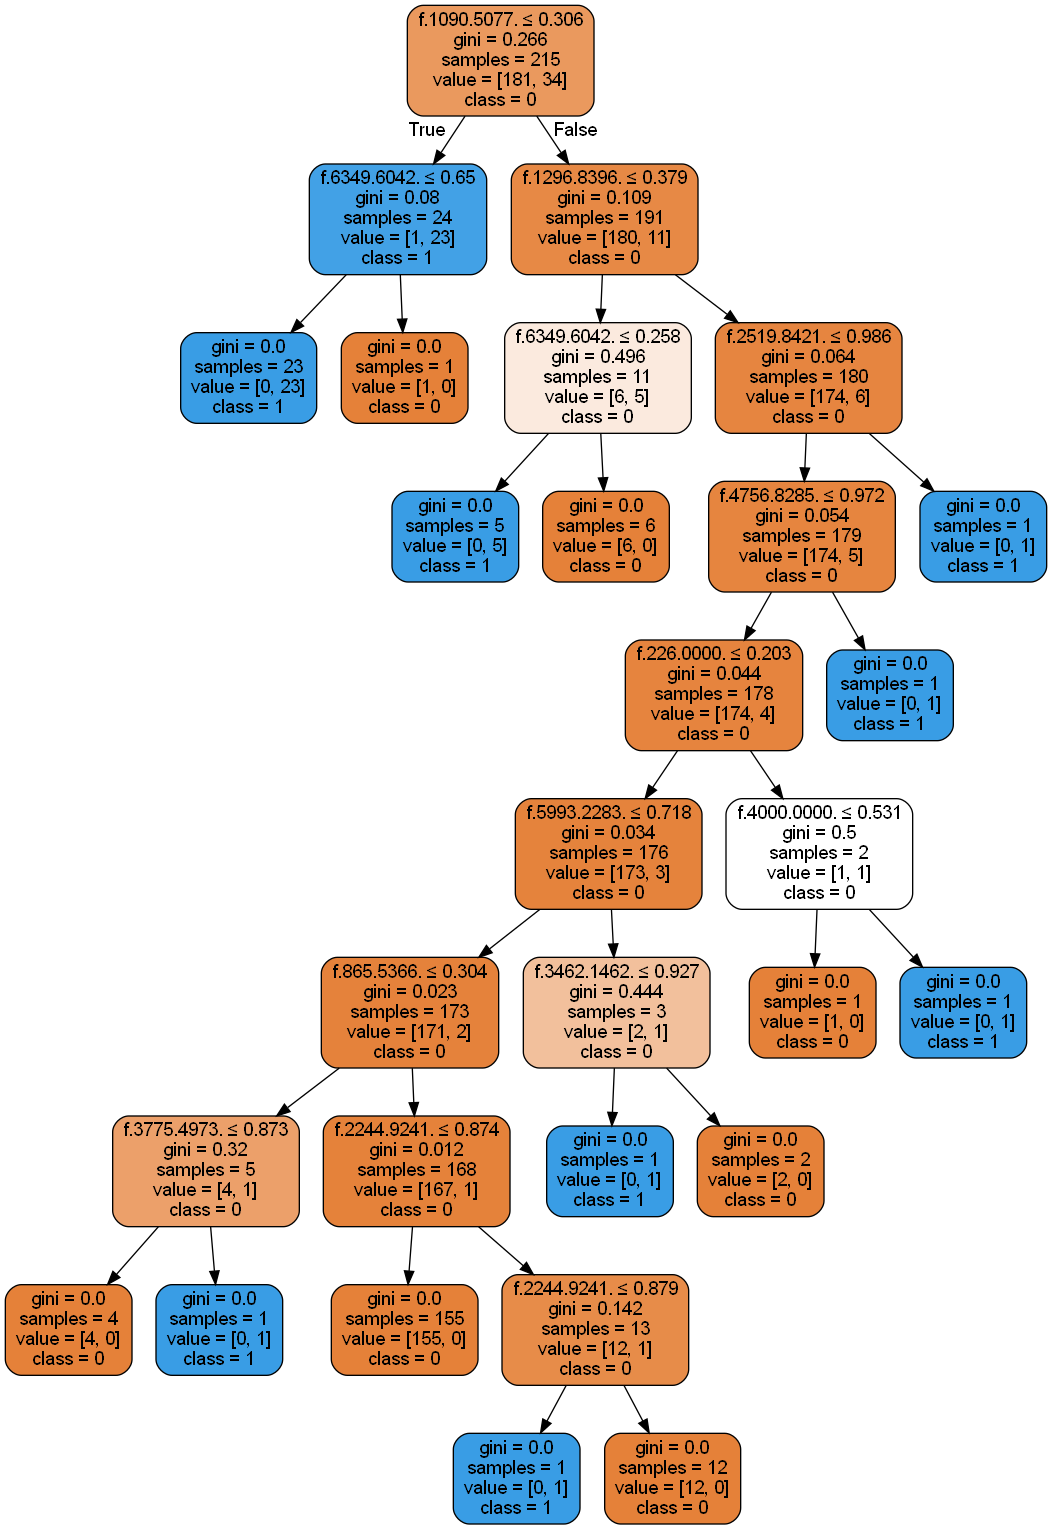

In [31]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())